# LSTM aplicado a série de Fibonacci

## Packages

In [2]:
import numpy as np
print(np.__version__)

from tensorflow.keras.optimizers import Adam

1.19.5


In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

## Tratando os dados

In [7]:
def fibonacci_lista(n): # Função geradora de numeros de fibonacci
    if n <= 0:
        return "O número deve ser maior que zero."
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]
    else:
        fib = [0, 1]
        while len(fib) < n:
            fib.append(fib[-1] + fib[-2])
        return fib

In [32]:
dados_t = fibonacci_lista(30)

In [10]:
dados_t

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229]

- **Construindo os conjuntos de treino, validação e teste**

In [42]:
conj_treino = dados_t[:10]
conj_valid = dados_t[10:15]
conj_teste = dados_t[15:30]

# Construindo os arrays
conj_treino = np.array(conj_treino, dtype='int32')
conj_valid = np.array(conj_valid, dtype='int32')
conj_teste = np.array(conj_teste, dtype='int32')

conj_treino = conj_treino[:, np.newaxis]
conj_valid = conj_valid[:, np.newaxis]
conj_teste = conj_teste[:, np.newaxis]

- **Construindo o tensor input**

In [52]:
X_treino = []
y_treino = []
for i in range(3, conj_treino.shape[0]):
    X_treino.append(conj_treino[i-3:i, 0])
    y_treino.append(conj_treino[i, 0])

X_treino, y_treino = np.array(X_treino), np.array(y_treino)

X_treino = np.reshape(X_treino, (X_treino.shape[0], X_treino.shape[1], 1))

In [53]:
y_treino

array([ 2,  3,  5,  8, 13, 21, 34])

In [50]:
X_valid = []
y_valid = []
for i in range(3, conj_valid.shape[0]):
    X_valid.append(conj_valid[i-3:i, 0])
    y_valid.append(conj_valid[i, 0])

X_valid, y_valid = np.array(X_valid), np.array(y_valid)

X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

In [51]:
y_valid

array([233, 377])

In [21]:
X_teste = []
y_teste = []
for i in range(3, conj_teste.shape[0]):
    X_teste.append(conj_teste[i-3:i, 0])
    y_teste.append(conj_teste[i, 0])

X_teste, y_teste = np.array(X_teste), np.array(y_teste)

X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [22]:
y_teste

array([  2584,   4181,   6765,  10946,  17711,  28657,  46368,  75025,
       121393, 196418, 317811, 514229])

## Modelo

In [23]:
modelo_fibonacci = Sequential()

modelo_fibonacci.add(LSTM(units=50, input_shape = (X_treino.shape[1], 1), activation='relu')) 

modelo_fibonacci.add(Dense(units=1))

modelo_fibonacci.compile(optimizer=Adam(lr=0.01), 
                         loss='mean_absolute_error', metrics=['accuracy'])

modelo_fibonacci.fit(X_treino, y_treino, epochs=100, batch_size=10, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/100
1/1 [==============================] - 1s 567ms/step - loss: 11.7827 - accuracy: 0.0000e+00 - val_loss: 272.0639 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 11.1200 - accuracy: 0.0000e+00 - val_loss: 257.0247 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 10.3661 - accuracy: 0.0000e+00 - val_loss: 240.0005 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 9.4444 - accuracy: 0.0000e+00 - val_loss: 210.3360 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 50ms/step - loss: 8.2656 - accuracy: 0.0000e+00 - val_loss: 121.9481 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 6.7112 - accuracy: 0.0000e+00 - val_loss: 8.1459 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 43ms/step - loss: 4.6564 - accuracy: 0.0000e

In [24]:
# Predicting the 16th number
predict_next_fib = modelo_fibonacci.predict(X_teste, verbose=1)

1/1 [==============================] - 0s 0s/step


## Avaliação

In [25]:
predict_next_fib_new = np.reshape(predict_next_fib, (predict_next_fib.shape[0],))

predict_next_fib_new

array([  2450.6216,   3964.4438,   6413.148 ,  10375.168 ,  16785.852 ,
        27158.557 ,  43941.94  ,  71098.03  , 115037.51  , 186133.08  ,
       301168.1   , 487298.7   ], dtype=float32)

In [26]:
y_teste

array([  2584,   4181,   6765,  10946,  17711,  28657,  46368,  75025,
       121393, 196418, 317811, 514229])

In [27]:
dicio = {
    "Previsão": predict_next_fib_new,
    "Reais": y_teste
}

df = pd.DataFrame(dicio)
df["Erro Relativo"] = (df["Reais"] - df["Previsão"])/df["Reais"] 

In [28]:
df

,Previsão,Reais,Erro Relativo
0,2450.621582,2584,0.051617
1,3964.443848,4181,0.051795
2,6413.147949,6765,0.052011
3,10375.167969,10946,0.052150
4,16785.851562,17711,0.052236
5,27158.556641,28657,0.052289
6,43941.941406,46368,0.052322
7,71098.031250,75025,0.052342
8,115037.507812,121393,0.052355
9,186133.078125,196418,0.052362


> Em geral, o modelo apresentou um erro de 5%

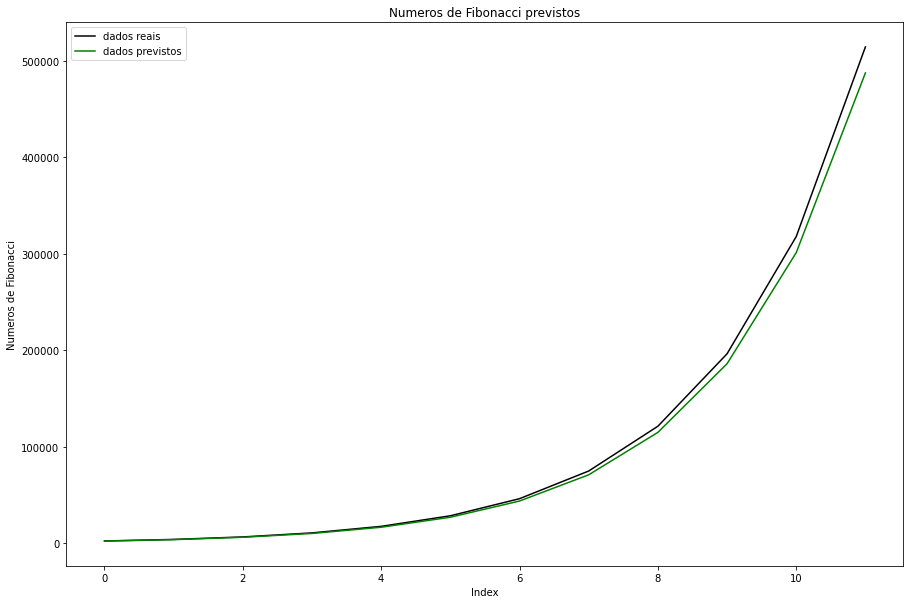

In [29]:
plt.figure(figsize=(15, 10))
plt.plot(y_teste, color = 'black', label = 'dados reais')
plt.plot(predict_next_fib, color = 'green', label = 'dados previstos')
plt.title('Numeros de Fibonacci previstos')
plt.xlabel('Index')
plt.ylabel('Numeros de Fibonacci')
plt.legend()
plt.show()

In [30]:
import plotly.graph_objects as go


In [31]:

fig = go.Figure()

# Adicionando os dados reais
fig.add_trace(go.Scatter(y=y_teste, mode='lines', name='dados reais', line=dict(color='black')))

# Adicionando os dados previstos
fig.add_trace(go.Scatter(y=predict_next_fib_new, mode='lines', name='dados previstos', line=dict(color='green')))

# Configurando os títulos e rótulos dos eixos
fig.update_layout(title='Numeros de Fibonacci previstos', xaxis_title='Index', yaxis_title='Numeros de Fibonacci', title_x = .5)

fig.show()
